In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv("data/Global YouTube Statistics.csv", encoding='latin1')

In [3]:
# Calculate the total subscribers and total video views for each country
country_subscribers = data.groupby('Country')['subscribers'].sum()
country_video_views = data.groupby('Country')['video views'].sum()

# Sort countries based on subscribers and video views
top_countries_subscribers = country_subscribers.sort_values(ascending=False).head(10)
top_countries_video_views = country_video_views.sort_values(ascending=False).head(10)

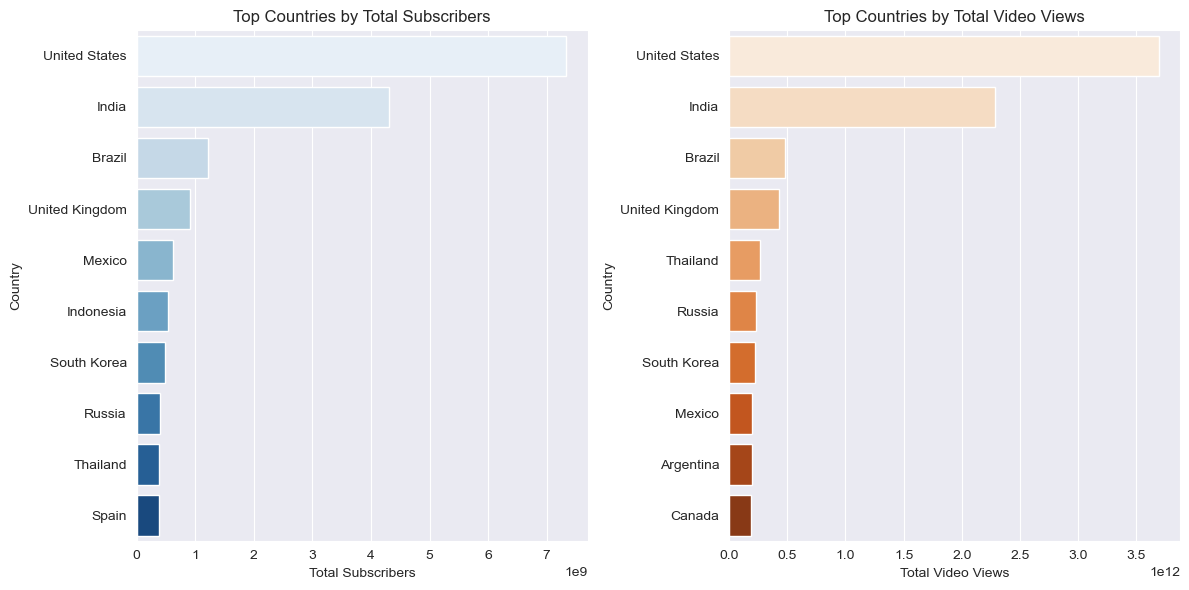

In [4]:
# Create bar plots for top countries based on subscribers and video views
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=top_countries_subscribers.values, y=top_countries_subscribers.index, palette='Blues')
plt.title('Top Countries by Total Subscribers')
plt.xlabel('Total Subscribers')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x=top_countries_video_views.values, y=top_countries_video_views.index, palette='Oranges')
plt.title('Top Countries by Total Video Views')
plt.xlabel('Total Video Views')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

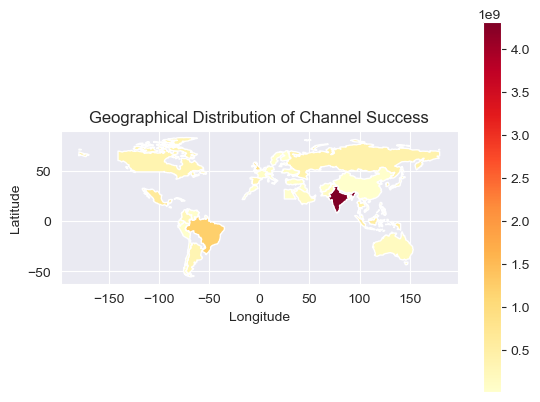

In [28]:
# Group by country and calculate total subscribers or video views
country_metrics = data.groupby('Country').agg({
    'subscribers': 'sum',
    'video views': 'sum'
}).reset_index()

# Load the world map shapefile from the downloaded file
world = gpd.read_file("data/ne_110m_admin_0_countries.zip")

# Merge the world map with the channel metrics data
world = world.merge(country_metrics, left_on='NAME', right_on='Country', how='left')

# Plot the world map with color-coded countries based on subscribers or video views
plt.figure(figsize=(15, 10))
world.plot(column='subscribers', cmap='YlOrRd', legend=True)
plt.title('Geographical Distribution of Channel Success')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

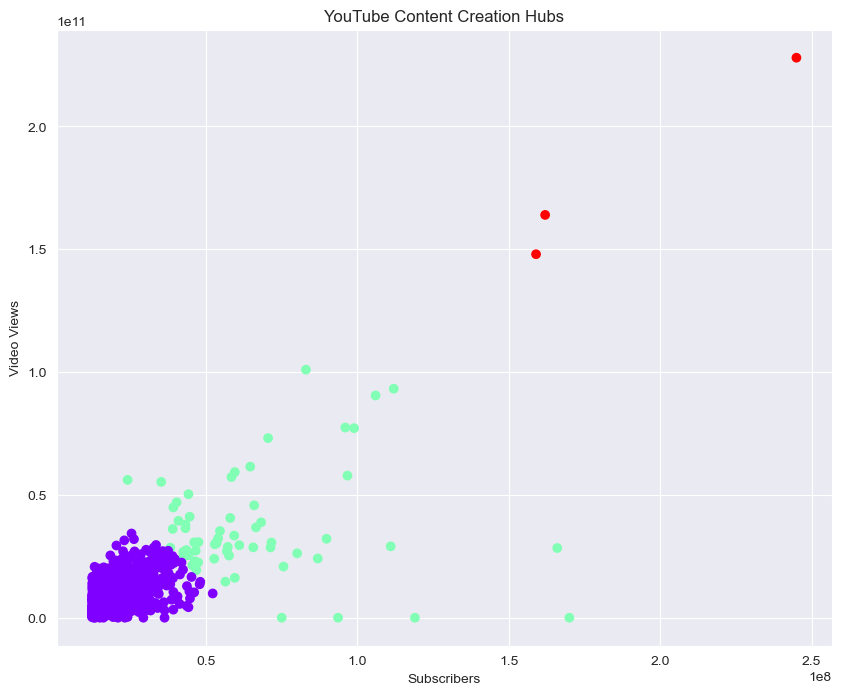

Cluster 0 contains countries: United States, Chile, United States, El Salvador, Brazil, Brazil, nan, Brazil, Thailand, nan, United States, Barbados, India, Mexico, Mexico, nan, United Arab Emirates, nan, India, United States, Spain, Brazil, United States, Saudi Arabia, India, United States, United States, United States, United States, United States, Thailand, India, India, Brazil, United States, United States, India, nan, United States, nan, nan, nan, Argentina, India, India, India, nan, United States, United States, nan, nan, India, Colombia, Indonesia, India, Spain, Brazil, United States, nan, United States, India, Thailand, India, United Kingdom, India, Indonesia, United States, India, Turkey, United States, Canada, nan, Colombia, United Kingdom, Brazil, India, nan, Philippines, Mexico, India, India, United States, United States, United States, United States, nan, United Kingdom, Venezuela, United States, Argentina, United States, United States, India, India, Kuwait, Indonesia, Unit

In [33]:
# Select relevant features for clustering (e.g., subscribers and video views)
features = data[['subscribers', 'video views']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=0)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Plot the clusters on a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(data['subscribers'], data['video views'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.title('YouTube Content Creation Hubs')
plt.show()

# Display countries in each cluster
for cluster_id in range(num_clusters):
    countries_in_cluster = data[data['cluster'] == cluster_id]['Country']
    print(f"Cluster {cluster_id} contains countries: {', '.join([str(country) for country in countries_in_cluster])}")